In [828]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [829]:
df=pd.read_csv('../DATA/lending_club_loan_two.csv')

In [830]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [831]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [832]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [833]:
feat_info('mort_acc')

Number of mortgage accounts.


In [834]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [835]:
df.shape

(396030, 27)

# Data Exploratory Analysis

In [836]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [837]:
feat_info('revol_bal')

Total credit revolving balance


In [838]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [839]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [840]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [841]:
df['loan_amnt'].describe()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

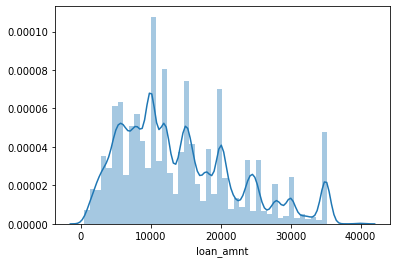

In [842]:
sns.distplot(df['loan_amnt'])

In [843]:
#df=df.sample(frac=0.5)

In [844]:
df.shape

(396030, 27)

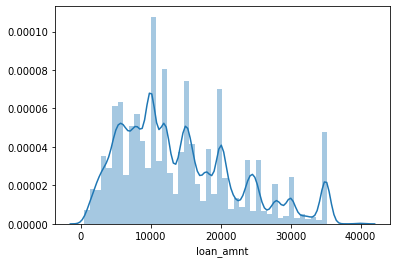

In [845]:
sns.distplot(df['loan_amnt'])

In [846]:
len(df)

396030

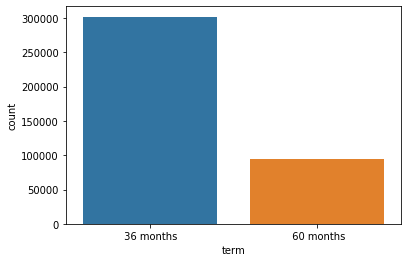

In [847]:
sns.countplot(df['term'])

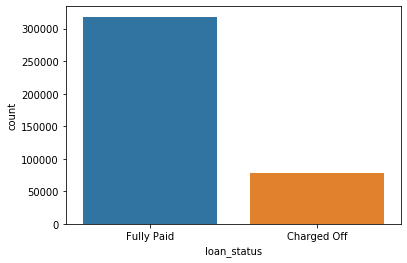

In [848]:
sns.countplot(df['loan_status'])

In [849]:
len(df['installment'].unique())

55706

In [850]:
df['installment'].unique()

array([329.48, 265.68, 506.97, ..., 343.14, 118.13, 572.44])

In [851]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [852]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [853]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [854]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


In [855]:
loan_Status=pd.get_dummies(df['loan_status'])

In [856]:
df=pd.concat([loan_Status,df],axis=1)

In [857]:
df.corr()['Charged Off'].sort_values()

Fully Paid             -1.000000
mort_acc               -0.073111
annual_inc             -0.053432
total_acc              -0.017893
revol_bal              -0.010892
pub_rec_bankruptcies    0.009383
pub_rec                 0.019933
open_acc                0.028012
installment             0.041082
loan_amnt               0.059836
dti                     0.062413
revol_util              0.082373
int_rate                0.247758
Charged Off             1.000000
Name: Charged Off, dtype: float64

In [858]:
from sklearn.preprocessing import LabelEncoder

In [859]:
label_encoder=LabelEncoder()

In [860]:
df['term_encode']=label_encoder.fit_transform(df['term'])

In [861]:
df.head()

,Charged Off,Fully Paid,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,term_encode
0,0,1,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0
1,0,1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0
2,0,1,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0
3,0,1,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",0
4,1,0,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",1


In [862]:
df.drop('term',axis=1,inplace=True)

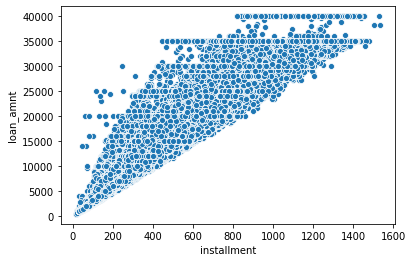

In [863]:
sns.scatterplot(df['installment'],df['loan_amnt'])

In [864]:
charge=df.groupby('home_ownership').mean()

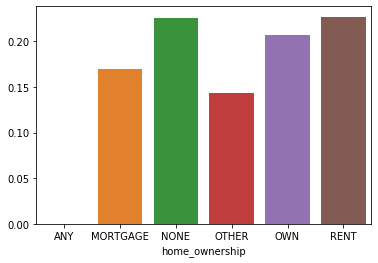

In [865]:
sns.barplot(x=charge.index,y=charge['Charged Off'].values)

In [866]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [867]:
verify=df.groupby('verification_status').mean()

In [868]:
verify

,Charged Off,Fully Paid,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,term_encode
verification_status,,,,,,,,,,,,,,,
Not Verified,0.146360,0.853640,10415.315953,12.228283,328.973299,65303.219305,16.324632,10.872779,0.130019,12851.247606,51.468190,24.044451,1.578887,0.099568,0.101326
Source Verified,0.214743,0.785257,14764.878791,13.723748,444.557888,78842.123029,17.147925,11.317327,0.213624,16014.552118,53.772981,25.398287,1.789501,0.137398,0.290848
Verified,0.223211,0.776789,16815.853414,14.824695,512.088158,77812.558485,18.542960,11.698229,0.188008,18367.199294,55.892194,26.658348,2.039983,0.126524,0.309093


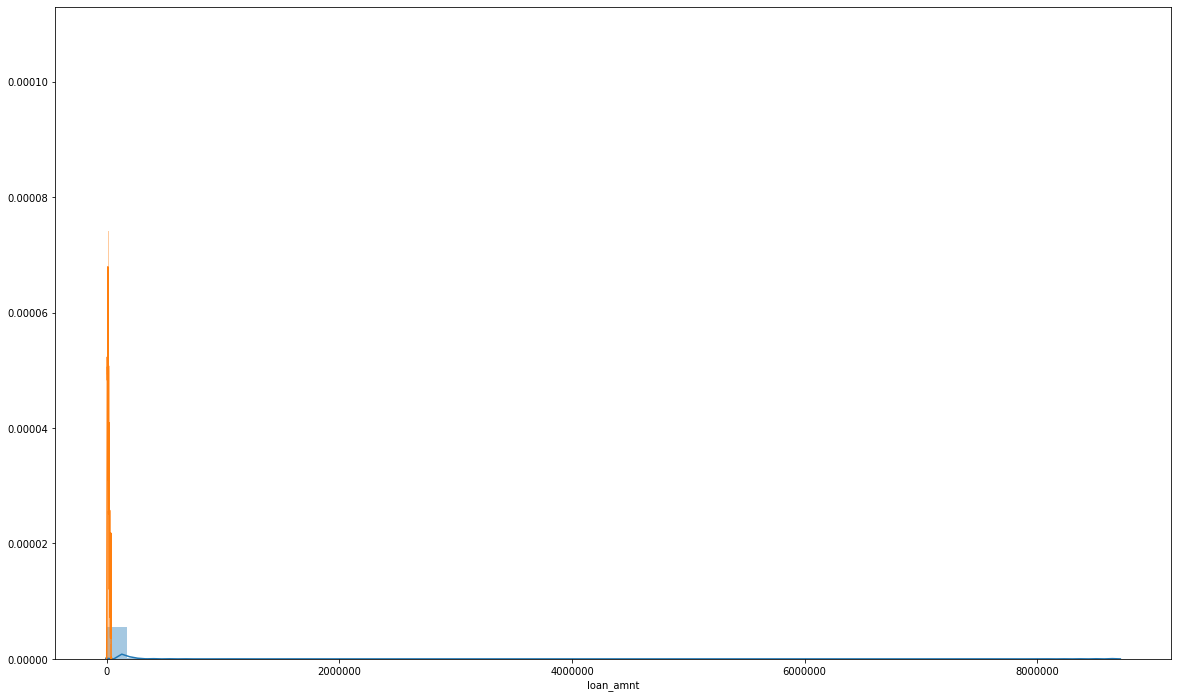

In [869]:
plt.figure(figsize=(20,12))
sns.distplot(df['annual_inc'])
sns.distplot(df['loan_amnt'])

In [870]:
df['loan_amnt'].max()

40000.0

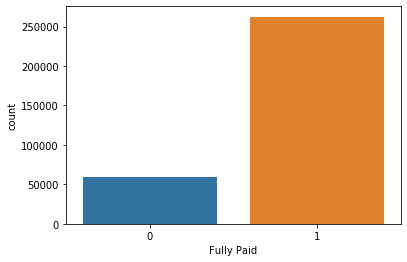

In [871]:
sns.countplot(df[df['annual_inc']>40000]['Fully Paid'])

In [872]:
df['annual_inc'].describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

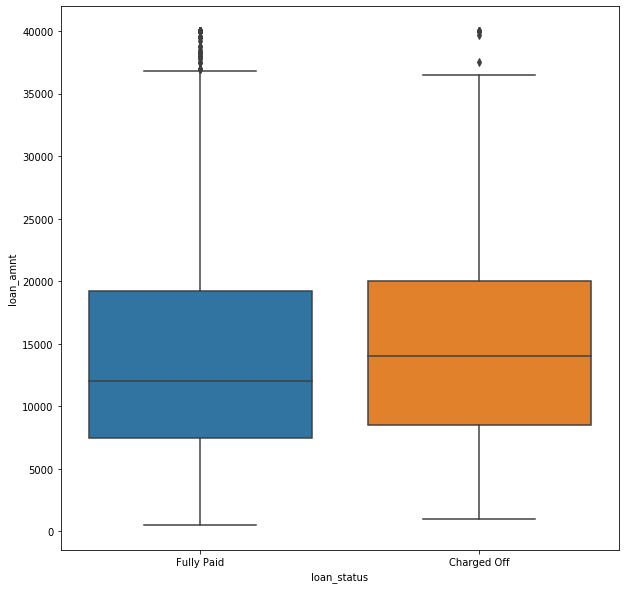

In [873]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['loan_status'],y=df['loan_amnt'])

C:\Users\Rajneesh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Rajneesh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Rajneesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Rajneesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


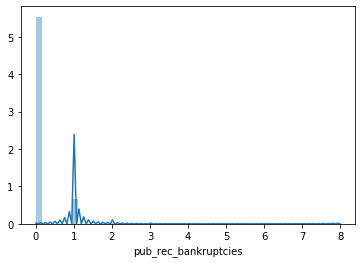

In [874]:
sns.distplot(df['pub_rec_bankruptcies'])

In [875]:
df['pub_rec_bankruptcies'].max()

8.0

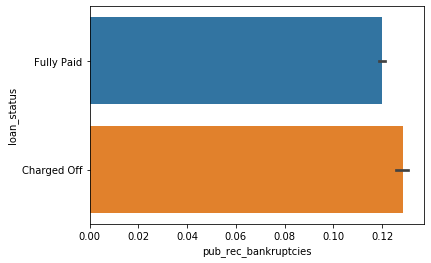

In [876]:
sns.barplot(y=df['loan_status'],x=df['pub_rec_bankruptcies'])

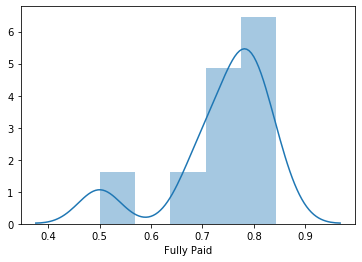

In [877]:
sns.distplot(df.groupby('pub_rec_bankruptcies').mean()['Fully Paid'])

In [878]:
df.groupby('pub_rec_bankruptcies').mean()['Fully Paid']

pub_rec_bankruptcies
0.0    0.805009
1.0    0.796050
2.0    0.767731
3.0    0.789174
4.0    0.682927
5.0    0.843750
6.0    0.714286
7.0    0.750000
8.0    0.500000
Name: Fully Paid, dtype: float64

In [879]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


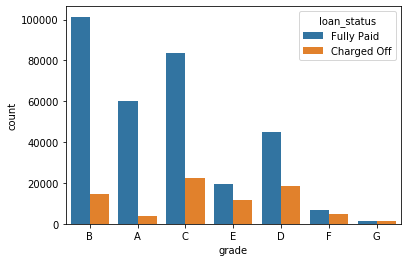

In [880]:
sns.countplot(df['grade'],hue=df['loan_status'],)

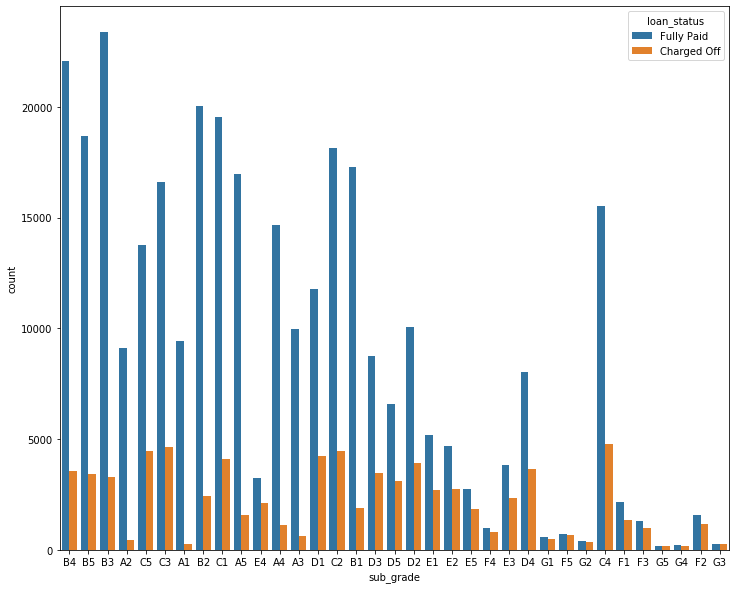

In [881]:
plt.figure(figsize=(12,10))
sns.countplot(df['sub_grade'],hue=df['loan_status'],)

In [882]:
subgrade_order=sorted(df['sub_grade'].unique())

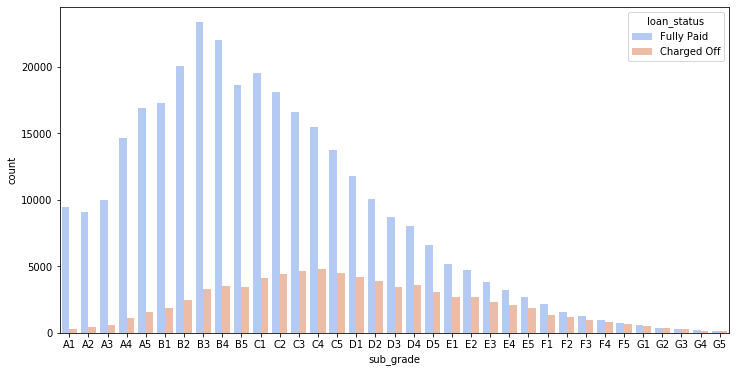

In [883]:
plt.figure(figsize=(12,6))
sns.countplot(df['sub_grade'],hue=df['loan_status'],order=subgrade_order,palette='coolwarm')

In [884]:
f_and_g=df[(df['grade']=='F') | (df['grade']=='G')]

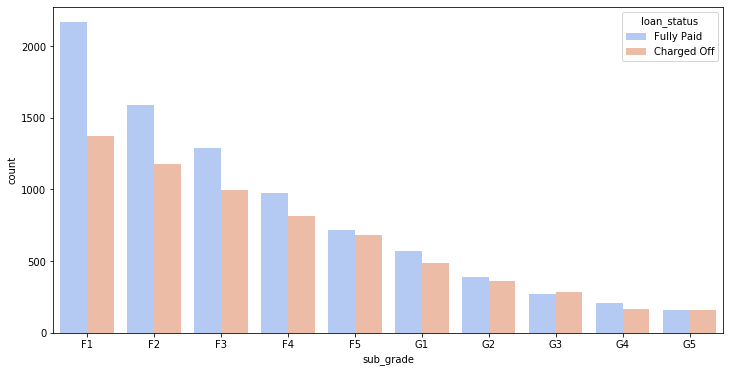

In [885]:
plt.figure(figsize=(12,6))
fgsuborder=sorted(f_and_g['sub_grade'].unique())
sns.countplot(f_and_g['sub_grade'],hue=f_and_g['loan_status'],order=fgsuborder,palette='coolwarm')

In [886]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [887]:
df['loan_code']=df['loan_status'].map({'Charged Off':0,'Fully Paid':1})

In [888]:
df.columns

Index(['Charged Off', 'Fully Paid', 'loan_amnt', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'term_encode', 'loan_code'],
      dtype='object')

In [889]:
df.shape

(396030, 30)

In [890]:
df.drop(['Charged Off','Fully Paid','loan_status'],axis=1,inplace=True)

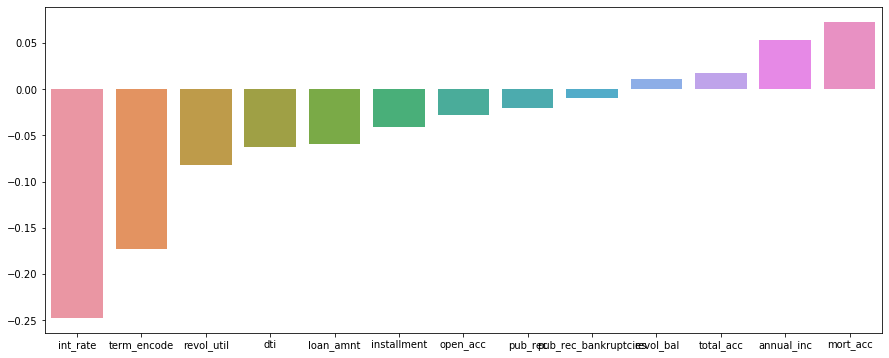

In [891]:
plt.figure(figsize=(15,6))
abc=df.corr()['loan_code'][:-1].sort_values()
sns.barplot(x=abc.index,y=abc.values)

# Data Preprocessing

In [892]:
df.isnull().sum()

loan_amnt                   0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
term_encode                 0
loan_code                   0
dtype: int64

In [893]:
df['emp_title'].nunique()

173105

In [894]:
(df.isnull().sum()*100)/len(df)

loan_amnt               0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
term_encode             0.000000
loan_code               0.000000
dtype: float64

In [895]:
df['emp_title'].value_counts()

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
                            ... 
bill swad                      1
Refreshment Solutions          1
Senior Human Resource          1
Sarah Neuman Corporation       1
Senior Gaming Agent            1
Name: emp_title, Length: 173105, dtype: int64

In [896]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [897]:
emplorder=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

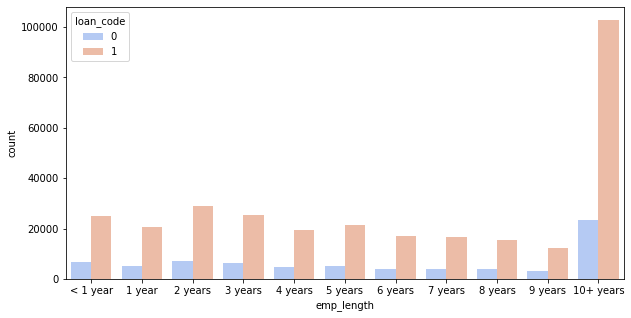

In [898]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['emp_length'],hue=df['loan_code'],order=emplorder,palette='coolwarm')

In [899]:
percent=[]
for i in emplorder:
    num=(df[(df['loan_code']==0) & (df['emp_length']==i)]['loan_code'].count())
    den=(df[(df['loan_code']==1) & (df['emp_length']==i)]['loan_code'].count())
    percent.append((num*100)/den)

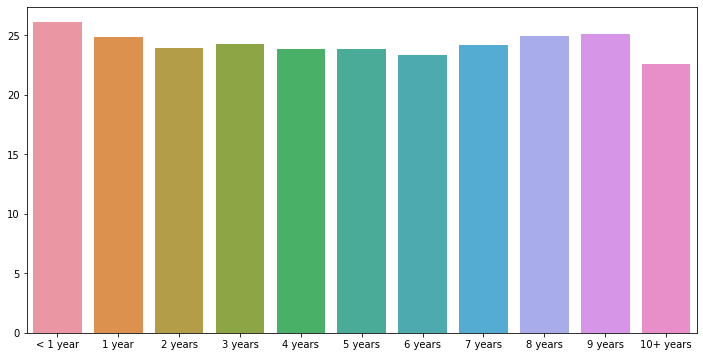

In [900]:
plt.figure(figsize=(12,6))
sns.barplot(x=emplorder,y=percent)

In [901]:
df.drop(['emp_title','emp_length'],axis=1,inplace=True)

In [902]:
df.isnull().sum()

loan_amnt                   0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
term_encode                 0
loan_code                   0
dtype: int64

In [903]:
feat_info('title')

The loan title provided by the borrower


In [904]:
df['title'].nunique()

48817

In [905]:
df['title'].head(20)

0                    Vacation
1          Debt consolidation
2     Credit card refinancing
3     Credit card refinancing
4       Credit Card Refinance
5          Debt consolidation
6            Home improvement
7        No More Credit Cards
8          Debt consolidation
9          Debt Consolidation
10         Debt Consolidation
11    Credit card refinancing
12         Debt consolidation
13         Debt consolidation
14                   Business
15             Major purchase
16         Debt consolidation
17         Debt consolidation
18         Debt consolidation
19         Debt consolidation
Name: title, dtype: object

In [906]:
df['purpose'].head(20)

0               vacation
1     debt_consolidation
2            credit_card
3            credit_card
4            credit_card
5     debt_consolidation
6       home_improvement
7            credit_card
8     debt_consolidation
9     debt_consolidation
10    debt_consolidation
11           credit_card
12    debt_consolidation
13    debt_consolidation
14        small_business
15        major_purchase
16    debt_consolidation
17    debt_consolidation
18    debt_consolidation
19    debt_consolidation
Name: purpose, dtype: object

In [907]:
df.drop('title',axis=1,inplace=True)

In [908]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [909]:
df['revol_util'].nunique()

1226

In [910]:
df['revol_util'].unique()

array([ 41.8 ,  53.3 ,  92.2 , ...,  56.26, 111.4 , 128.1 ])

In [911]:
feat_info('revol_bal')

Total credit revolving balance


In [912]:
df['revol_bal'].unique()

array([ 36369.,  20131.,  11987., ...,  34531., 151912.,  29244.])

In [913]:
df.corr()['revol_util'].sort_values()

open_acc               -0.131420
total_acc              -0.104273
pub_rec_bankruptcies   -0.086751
loan_code              -0.082373
pub_rec                -0.075910
mort_acc                0.007514
annual_inc              0.027871
term_encode             0.055166
dti                     0.088375
loan_amnt               0.099911
installment             0.123915
revol_bal               0.226346
int_rate                0.293659
revol_util              1.000000
Name: revol_util, dtype: float64

In [914]:
df.isnull().sum()

loan_amnt                   0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
term_encode                 0
loan_code                   0
dtype: int64

In [915]:
df['mort_acc'].nunique()

33

In [916]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [917]:
feat_info('mort_acc')

Number of mortgage accounts.


In [918]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_code               0.073111
term_encode             0.096220
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [919]:
impute_na=df.groupby('total_acc').mean()['mort_acc']

In [920]:
df['mort_acc']=df[['total_acc','mort_acc']].apply(impute_mort,axis=1)

In [921]:
def impute_mort(x):
    total=x[0]
    mort=x[1]
    
    if pd.isnull(mort):
        return impute_na[total]
    else:
        return mort

In [922]:
df.isnull().sum()

loan_amnt                 0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
term_encode               0
loan_code                 0
dtype: int64

In [923]:
df.dropna(axis=0,inplace=True)

In [924]:
df.isnull().sum()

loan_amnt               0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
term_encode             0
loan_code               0
dtype: int64

In [925]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
loan_amnt               395219 non-null float64
int_rate                395219 non-null float64
installment             395219 non-null float64
grade                   395219 non-null object
sub_grade               395219 non-null object
home_ownership          395219 non-null object
annual_inc              395219 non-null float64
verification_status     395219 non-null object
issue_d                 395219 non-null object
purpose                 395219 non-null object
dti                     395219 non-null float64
earliest_cr_line        395219 non-null object
open_acc                395219 non-null float64
pub_rec                 395219 non-null float64
revol_bal               395219 non-null float64
revol_util              395219 non-null float64
total_acc               395219 non-null float64
initial_list_status     395219 non-null object
application_type        395219 no

In [926]:
from sklearn.preprocessing import LabelEncoder

In [927]:
le=LabelEncoder()

In [928]:
df['grade_encode']=le.fit_transform(df['grade'])

In [929]:
df.head()

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,term_encode,loan_code,grade_encode
0,10000.0,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,vacation,...,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0,1,1
1,8000.0,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,...,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0,1,1
2,15600.0,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,credit_card,...,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0,1,1
3,7200.0,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,credit_card,...,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",0,1,0
4,24375.0,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,...,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",1,0,2


In [930]:
df.drop('grade',axis=1,inplace=True)

In [931]:
df['sub_grade_en']=le.fit_transform(df['sub_grade'])

In [932]:
df.drop('sub_grade',axis=1,inplace=True)

In [933]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [934]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [935]:
df['home_ownership']=df['home_ownership'].replace({'NONE':'OTHER','ANY':'OTHER'})

In [936]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [937]:
df.shape

(395219, 24)

In [938]:
dummy=pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([dummy,df],axis=1)
df.drop('home_ownership',axis=1,inplace=True)

In [939]:
df.shape

(395219, 26)

In [940]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [941]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [942]:
dummies=pd.get_dummies(df['verification_status'],drop_first=True)
pd.concat([df,dummies],axis=1)
df.drop('verification_status',axis=1,inplace=True)

In [943]:
df.select_dtypes(include='object').columns

Index(['issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [944]:
df['issue_d'].unique()

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2011', 'Apr-2010',
       'Jun-2014', 'Oct-2013', 'May-2013', 'Feb-2015', 'Oct-2011',
       'Jun-2015', 'Aug-2013', 'Feb-2014', 'Dec-2011', 'Mar-2013',
       'Jun-2016', 'Mar-2014', 'Nov-2013', 'Dec-2014', 'Apr-2016',
       'Sep-2013', 'May-2016', 'Jul-2015', 'Jul-2013', 'Aug-2014',
       'May-2008', 'Mar-2010', 'Dec-2013', 'Mar-2012', 'Mar-2015',
       'Sep-2011', 'Jul-2012', 'Dec-2012', 'Sep-2014', 'Nov-2012',
       'Nov-2015', 'Jan-2011', 'May-2012', 'Feb-2016', 'Jun-2012',
       'Aug-2012', 'Jan-2016', 'May-2015', 'Oct-2016', 'Aug-2015',
       'Jul-2016', 'May-2009', 'Aug-2016', 'Jan-2012', 'Jan-2013',
       'Nov-2010', 'Jul-2011', 'Mar-2011', 'Feb-2012', 'May-2011',
       'Aug-2010', 'Nov-2016', 'Jul-2010', 'Sep-2010', 'Dec-20

In [945]:
df['issue_d'].value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Nov-2007        1
Aug-2007        1
Oct-2007        1
Name: issue_d, Length: 112, dtype: int64

In [946]:
feat_info('issue_d')

The month which the loan was funded


It would be data leakage if we include this feature as we don't know when the loan will be issued

In [947]:
df.drop('issue_d',inplace=True,axis=1)

In [948]:
df['purpose'].nunique()

14

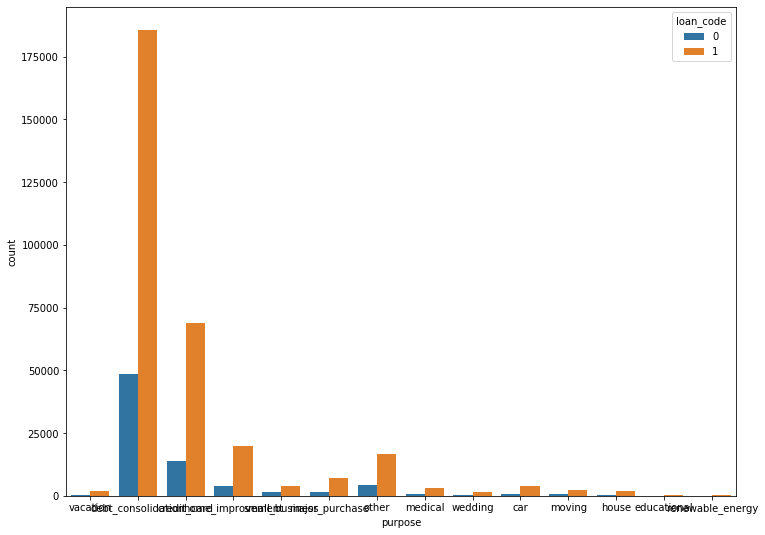

In [949]:
plt.figure(figsize=(12,9))
sns.countplot(x=df['purpose'],hue=df['loan_code'])

In [950]:
dummie=pd.get_dummies(df[['application_type','initial_list_status','purpose']],drop_first=True)
df.drop(['application_type','initial_list_status','purpose'],axis=1,inplace=True)


In [951]:
df=pd.concat([df,dummie],axis=1)

In [952]:
df.shape

(395219, 37)

In [953]:
df.select_dtypes(include='object').columns

Index(['earliest_cr_line', 'address'], dtype='object')

In [954]:
df['earliest_cr_line'].unique()

array(['Jun-1990', 'Jul-2004', 'Aug-2007', 'Sep-2006', 'Mar-1999',
       'Jan-2005', 'Aug-2005', 'Sep-1994', 'Jun-1994', 'Dec-1997',
       'Dec-1990', 'May-1984', 'Apr-1995', 'Jan-1997', 'May-2001',
       'Mar-1982', 'Sep-1996', 'Jan-1990', 'Mar-2000', 'Jan-2006',
       'Oct-2006', 'Jan-2003', 'May-2008', 'Oct-2003', 'Jun-2004',
       'Jan-1999', 'Apr-1994', 'Apr-1998', 'Jul-2007', 'Apr-2002',
       'Oct-2007', 'Jun-2009', 'May-1997', 'Jul-2006', 'Sep-2003',
       'Aug-1992', 'Dec-1988', 'Feb-2002', 'Jan-1992', 'Aug-2001',
       'Dec-2010', 'Oct-1999', 'Sep-2004', 'Aug-1994', 'Jul-2003',
       'Apr-2000', 'Dec-2004', 'Jun-1995', 'Dec-2003', 'Jul-1994',
       'Oct-1990', 'Dec-2001', 'Apr-1999', 'Feb-1995', 'May-2003',
       'Oct-2002', 'Mar-2004', 'Aug-2003', 'Oct-2000', 'Nov-2004',
       'Mar-2010', 'Mar-1996', 'May-1994', 'Jun-1996', 'Nov-1986',
       'Jan-2001', 'Jan-2002', 'Mar-2001', 'Sep-2012', 'Apr-2006',
       'May-1998', 'Dec-2002', 'Nov-2003', 'Oct-2005', 'May-19

In [955]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [956]:
df['earliest_cr_yr']=df['earliest_cr_line'].apply(lambda x:int(x[4:]))

In [957]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [958]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [959]:
df['zip_code']=df['address'].apply(lambda x:int(x[-4:]))

In [960]:
df['zip_code'].value_counts()

466     56880
2690    56413
723     56402
8052    55811
813     45725
9597    45393
5113    45300
1650    11210
3700    11126
6630    10959
Name: zip_code, dtype: int64

In [961]:
df.drop('address',axis=1,inplace=True)

In [962]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [963]:
X=df.drop('loan_code',axis=1).values
y=df['loan_code'].values

In [964]:
from sklearn.preprocessing import MinMaxScaler

In [965]:
mms=MinMaxScaler()

In [966]:
#X=mms.fit_transform(X)

In [967]:
#X=pd.DataFrame(data=X,columns=df.drop('loan_code',axis=1).columns)

In [968]:
#y=y.values

In [969]:
#y=mms.transform(y)

In [970]:
from sklearn.model_selection import train_test_split

In [981]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [982]:
X_train=mms.fit_transform(X_train)

In [983]:
X_test=mms.transform(X_test)

In [985]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.78461538,
        0.24356587],
       [0.        , 0.        , 1.        , ..., 0.        , 0.83076923,
        0.02814588],
       [0.        , 0.        , 0.        , ..., 0.        , 0.8       ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.84615385,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.76923077,
        0.50892564],
       [0.        , 0.        , 0.        , ..., 0.        , 0.73846154,
        0.02814588]])

In [986]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [987]:
model=Sequential()

In [988]:

model.add(Dense(units=78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))


In [989]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [990]:
model.fit(X_train,y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Train on 264796 samples, validate on 130423 samples
Epoch 1/25
264796/264796 [==============================] - 13s 50us/sample - loss: 0.4576 - val_loss: 0.4314
Epoch 2/25
264796/264796 [==============================] - 7s 27us/sample - loss: 0.4324 - val_loss: 0.4174
Epoch 3/25
264796/264796 [==============================] - 7s 26us/sample - loss: 0.4139 - val_loss: 0.3759
Epoch 4/25
264796/264796 [==============================] - 7s 27us/sample - loss: 0.3800 - val_loss: 0.3480
Epoch 5/25
264796/264796 [==============================] - 8s 29us/sample - loss: 0.3609 - val_loss: 0.3292
Epoch 6/25
264796/264796 [==============================] - 7s 27us/sample - loss: 0.3416 - val_loss: 0.3032
Epoch 7/25
264796/264796 [==============================] - 8s 29us/sample - loss: 0.3245 - val_loss: 0.2877
Epoch 8/25
264796/264796 [==============================] - 7s 28us/sample - loss: 0.3131 - val_loss: 0.2828
Epoch 9/25
264796/264796 [==============================] - 7s 28us/sample 

In [991]:
model_loss=pd.DataFrame(model.history.history)

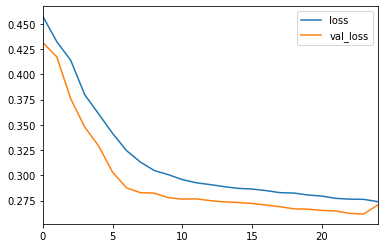

In [992]:
model_loss.plot()

In [993]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [994]:
y_pred=model.predict_classes(X_test)

In [995]:
confusion_matrix(y_test,y_pred)

array([[ 10916,  14564],
       [     6, 104937]], dtype=int64)

In [996]:
accuracy_score(y_test,y_pred)

0.8882865752206283

In [997]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     25480
           1       0.88      1.00      0.94    104943

    accuracy                           0.89    130423
   macro avg       0.94      0.71      0.77    130423
weighted avg       0.90      0.89      0.87    130423

